In [19]:
import json
import requests
import pandas as pd
import numpy as np


api_token = open("SECRETS/API_TOKEN.txt", "r").read()
headers = {
  'Authorization': 'ApiToken {}'.format(api_token)
}

In [2]:
#load station data
url = "https://api.ims.gov.il/v1/Envista/stations"
response = requests.request("GET", url, headers=headers)
data= json.loads(response.text.encode('utf8'))

In [3]:
#convert to df
stations = pd.DataFrame(data)
stations.head()

#extract x,y coordinates
stations['y'] = [x['latitude'] for x in stations['location']]
stations['x'] = [x['latitude'] for x in stations['location']]

###TO CSV
stations[['stationId','name','shortName', 'y', 'x', 'timebase','active','owner','regionId' ]].to_csv('data/stations/stations.csv', index=False)

stations.head()

,stationId,name,shortName,stationsTag,location,timebase,active,owner,regionId,monitors,StationTarget,y,x
0,2,AVNE ETAN,AVNE ETA,(null),"{'latitude': 32.817, 'longitude': 35.763}",10,True,ims,8,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",,32.817,32.817
1,6,BET ZAYDA,BET ZAYD,(null),"{'latitude': 32.881, 'longitude': 35.653}",10,True,ims,9,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",,32.881,32.881
2,8,ZEMAH,ZEMAH,(null),"{'latitude': 32.704, 'longitude': 35.584}",10,True,ims,9,"[{'channelId': 1, 'name': 'WS', 'alias': None,...",,32.704,32.704
3,9,ZEMAH 20020703,ZEMAH 20,(null),"{'latitude': None, 'longitude': None}",10,False,ims,6,"[{'channelId': 1, 'name': 'T-.1m', 'alias': No...",,NaN,NaN
4,10,MEROM GOLAN PICMAN,MEROM GO,(null),"{'latitude': 33.133, 'longitude': 35.783}",10,True,ims,8,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",,33.133,33.133


In [4]:
#create table with available channels for each station
stationChannels = pd.DataFrame()

#loop through stations to extract available channels
for i, station in stations.iterrows():
    stationId = station['stationId']
    stationName = station['name']
    #for each station, loop through avaialble channels and add to stationChannels Table
    for channel in station['monitors']:
#         print(channel)
        d = {'stationId': stationId,
             'stationName': stationName,
             'channelID': channel['channelId'],
            'channelName': channel['name'],
             'unit' : channel['units'],
            'active': channel['active'],
            'typeId': channel['typeId']}
        stationChannels = stationChannels.append(d, ignore_index=True)
        
stationChannels = stationChannels[['stationId','stationName','channelID','channelName','unit','active','typeId']]

# to_csv
stationChannels.set_index(['stationId','stationName']).to_csv('data/stations/stationChannels.csv')

In [5]:
##extract channel types
channelTypes = stationChannels[['typeId','channelName','unit']].drop_duplicates().sort_values(by='typeId').reset_index(drop=True)

#remove erroneous Rain channel (wrong units)
channelTypes = channelTypes.drop(1).reset_index(drop=True)

#save to csv
channelTypes.to_csv('data/stations/channelTypes.csv', index=False)

,stationId,name,shortName,stationsTag,location,timebase,active,owner,regionId,monitors,StationTarget,y,x
30,54,BET DAGAN,BET DAGA,(null),"{'latitude': 32.009, 'longitude': 34.814}",10,True,ims,13,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",,32.009,32.009


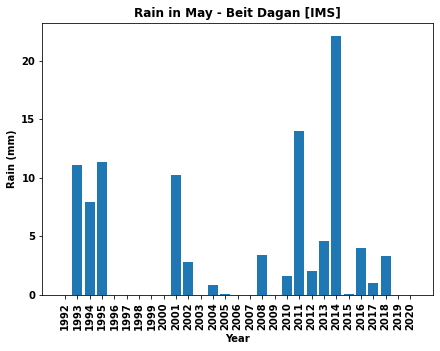

In [50]:
dd